In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
def gini_impurity(column):
    impurity = 1
    counters = Counter(column)
    for value in column.unique():
        impurity -= (counters[value] / len(column)) ** 2

    return impurity

In [35]:

data = pd.read_csv('features.csv',usecols=['churn_yn','longest_time_between_events', 'survival_time', 'event_num', 'enterworld_num', 'levelup_num', 'spendmoney_num', 'itemupgrade_successrate', 'sessions_num'])
data = data.dropna()
data['survival_time'] = data['survival_time'].str.replace(r'\+', '', regex=True).astype('int')
data

#data=data.iloc[:500]

,churn_yn,survival_time,event_num,enterworld_num,levelup_num,spendmoney_num,itemupgrade_successrate,longest_time_between_events,sessions_num
1,0.0,126,39385.0,193.0,5.0,1358.0,0.00,253529.85,167.0
2,0.0,232,37423.0,176.0,19.0,907.0,0.00,436143.07,152.0
3,0.0,34,33900.0,102.0,74.0,540.0,0.00,458000.84,87.0
4,0.0,87,49063.0,237.0,0.0,470.0,0.00,161775.37,187.0
5,1.0,18,4608.0,28.0,0.0,190.0,0.00,1280471.93,28.0
...,...,...,...,...,...,...,...,...,...
4015,1.0,23,37206.0,176.0,39.0,2114.0,0.00,332403.55,176.0
4016,1.0,21,4932.0,6.0,5.0,44.0,0.00,454534.61,7.0
4017,0.0,131,28439.0,122.0,106.0,934.0,0.00,412474.64,123.0
4018,0.0,273,103938.0,894.0,6.0,3120.0,0.00,70476.16,771.0


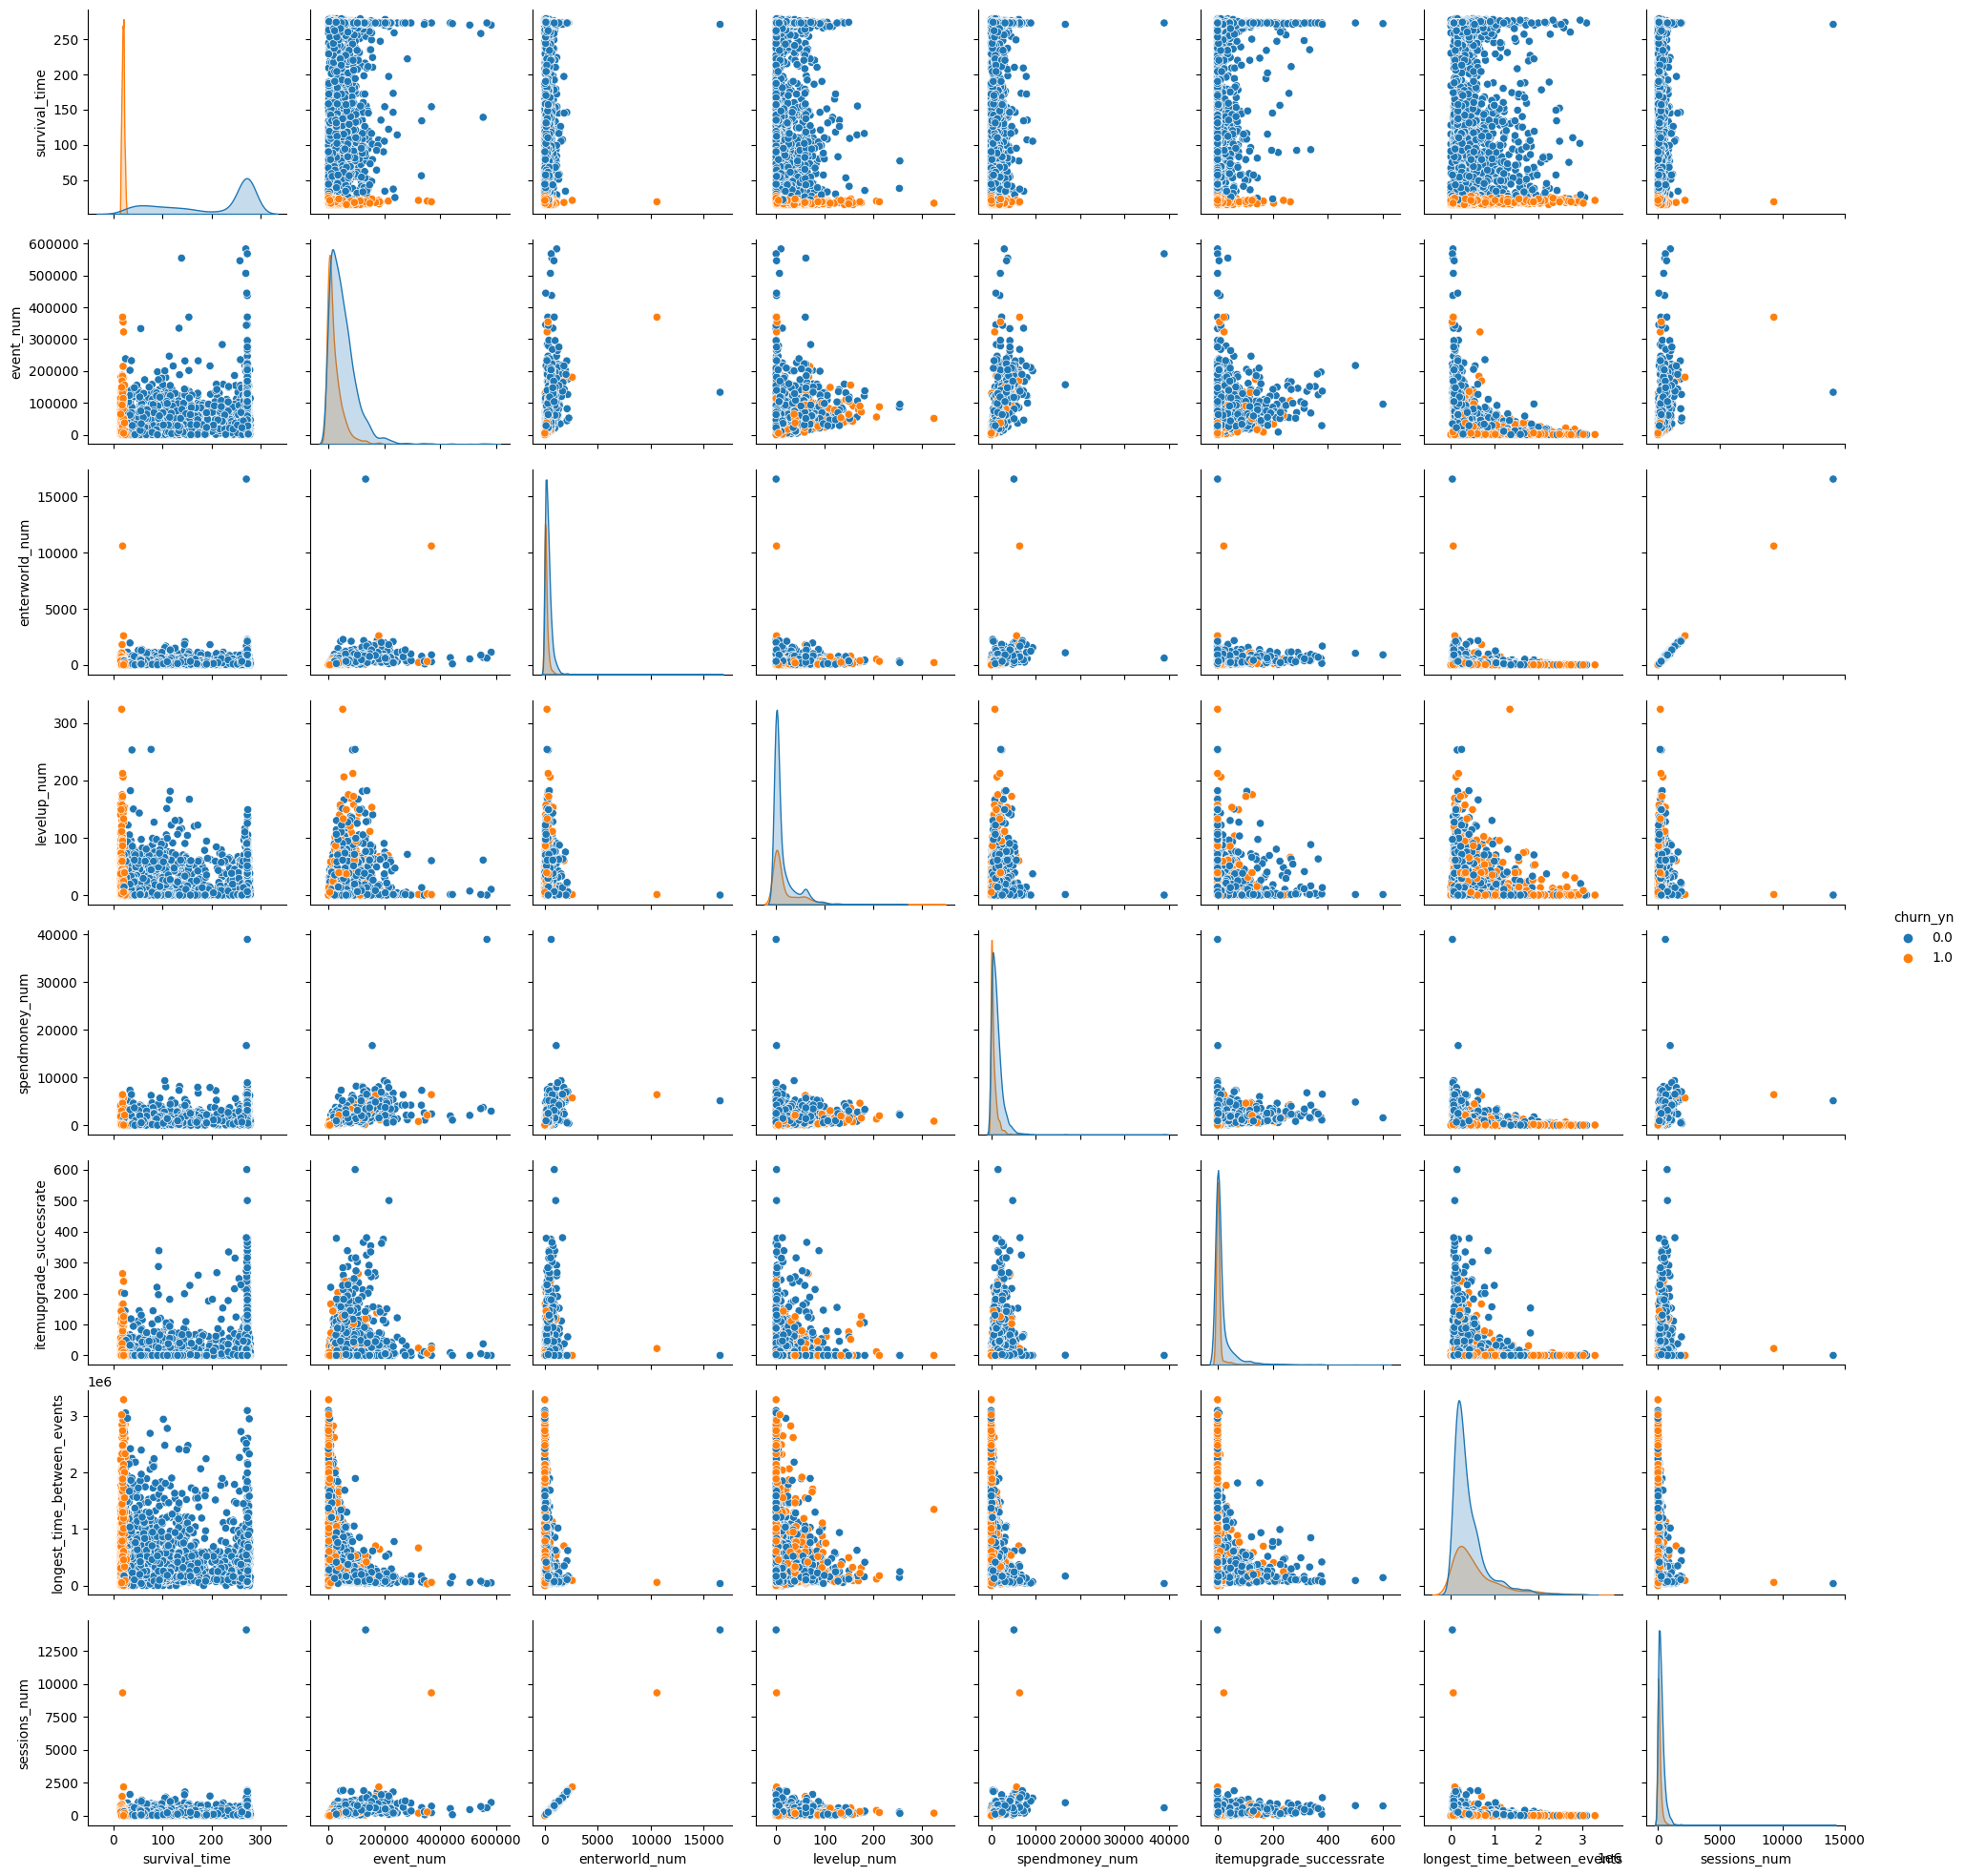

In [36]:

sns.pairplot(data=data, hue='churn_yn')
plt.show()

In [38]:

X = data.copy()
y = X.pop('churn_yn')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [ ]:

DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=2, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=8, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0)

In [40]:

clf = DecisionTreeClassifier(criterion='gini', 
    splitter='best', 
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=10, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=10)

In [41]:
predictions = clf.predict(X_test)
print(predictions[:10])

[1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]


In [42]:
print(accuracy_score(y_test, predictions))

0.9899497487437185


[Text(0.6052631578947368, 0.9166666666666666, 'X[0] <= 25.5\ngini = 0.419\nsamples = 2985\nvalue = [2093, 892]'),
 Text(0.3157894736842105, 0.75, 'X[0] <= 24.5\ngini = 0.045\nsamples = 903\nvalue = [21, 882]'),
 Text(0.10526315789473684, 0.5833333333333334, 'X[0] <= 21.5\ngini = 0.027\nsamples = 875\nvalue = [12, 863]'),
 Text(0.05263157894736842, 0.4166666666666667, 'gini = 0.0\nsamples = 713\nvalue = [0, 713]'),
 Text(0.15789473684210525, 0.4166666666666667, 'X[5] <= 136.5\ngini = 0.137\nsamples = 162\nvalue = [12, 150]'),
 Text(0.10526315789473684, 0.25, 'X[4] <= 511.5\ngini = 0.117\nsamples = 160\nvalue = [10, 150]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.048\nsamples = 121\nvalue = [3, 118]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5263157894736842, 0.5833333333333334, 'X[4] <= 41.5\ngini = 0.436\nsamples = 28\nvalue = [9

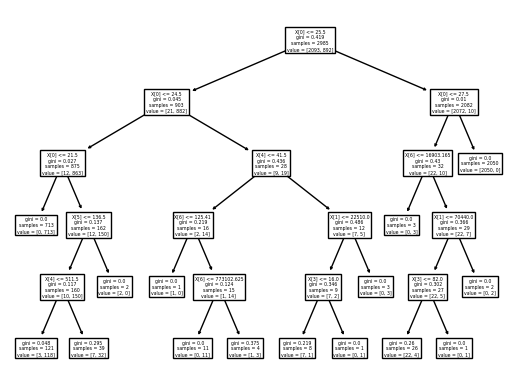

In [43]:
tree.plot_tree(clf)